### Import Library


In [1]:
# Basic python
import pandas as pd
import numpy as np

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Read data on google drive
#from google.colab import drive
#drive.mount('/content/drive')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

### Read the Dataset

Description of dataset:
....

Source: https://www.kaggle.com/datasets/omartorres25/honda-data 

In [3]:
cars = pd.read_csv("honda_sell_data.csv")
print("The shape of the dataset: {} \n".format(cars.shape))
cars.head()

The shape of the dataset: (4999, 25) 



,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,Ridgeline RTL,New,"$46,370",4.8,9,Platinum White Pearl,Beige,All-wheel Drive,...,00830164,10,5.0,4.8,4.8,4.2,5.0,5.0,CA,Dealer
1,2023,Honda,CR-V Hybrid Sport,New,"$34,150",1.7,24,Platinum White Pearl,Black,FWD,...,6402953,–,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
2,2023,Honda,CR-V Hybrid Sport,New,"$34,245",4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,...,PH704805,1,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
3,2022,Honda,Pilot TrailSport,New,"$46,500",5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,...,5700429B,5,5.0,5.0,5.0,5.0,5.0,5.0,CA,Dealer
4,2023,Honda,CR-V Hybrid Sport Touring,New,"$40,395",4.4,12,Crystal Black Pearl,Black,All-wheel Drive,...,5705954,5,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer


Since we want to predict the price of the used car, then we need to select the dataset which car condition is used.

In [ ]:
# Select used car condition
used_cars = cars[cars['Condition'] == 'Used']
used_cars.head()

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
487,2017,Honda,Accord LX,Used,"$12,499",4.5,188,White,Tan,Front-wheel Drive,...,214342,86667,4.8,4.8,4.8,4.8,4.8,4.9,FL,Dealer
514,2016,Honda,Accord EX,Used,"$22,998",4.7,0,Blue,Gray,Front-wheel Drive,...,23826253,53233,4.8,4.7,4.7,4.7,4.8,4.8,TX,Dealer
602,2012,Honda,Civic LX,Used,"$14,988",4.5,0,–,–,Front-wheel Drive,...,CAR9912,45958,4.3,4.3,4.4,4.6,4.5,4.8,CA,Dealer
604,2021,Honda,Accord EX-L,Used,"$30,998",4.8,2,Red,Gray,Front-wheel Drive,...,23664305,19130,4.9,4.8,4.8,4.8,4.9,4.8,CA,Dealer
606,2020,Honda,Accord Hybrid EX-L,Used,"$31,598",4.3,623,Platinum White Pearl,–,FWD,...,LA016988,17498,4.7,4.8,4.5,4.6,4.7,4.8,NV,Dealer


### Data Understanding
Exploratory Data Analysis (EDA)

In [ ]:
# Check the information about the dataset
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2022 entries, 487 to 4997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     2022 non-null   int64  
 1   Make                     2022 non-null   object 
 2   Model                    2022 non-null   object 
 3   Condition                2022 non-null   object 
 4   Price                    2022 non-null   object 
 5   Consumer_Rating          2022 non-null   float64
 6   Consumer_Review_#        2022 non-null   int64  
 7   Exterior_Color           2018 non-null   object 
 8   Interior_Color           2018 non-null   object 
 9   Drivetrain               2018 non-null   object 
 10  MPG                      1961 non-null   object 
 11  Fuel_Type                2018 non-null   object 
 12  Transmission             2018 non-null   object 
 13  Engine                   2018 non-null   object 
 14  VIN                   

The dataset contain 25 columns and 2022 rows of data.

In [ ]:
# Check the missing values
used_cars.isnull().sum()

Year                        0
Make                        0
Model                       0
Condition                   0
Price                       0
Consumer_Rating             0
Consumer_Review_#           0
Exterior_Color              4
Interior_Color              4
Drivetrain                  4
MPG                        61
Fuel_Type                   4
Transmission                4
Engine                      4
VIN                         4
Stock_#                     4
Mileage                     4
Comfort_Rating             26
Interior_Design_Rating     26
Performance_Rating         26
Value_For_Money_Rating     26
Exterior_Styling_Rating    26
Reliability_Rating         26
State                      66
Seller_Type                66
dtype: int64

This dataset still contains null values, we will handle the missing values by removing the missing values.

---



In [ ]:
# Before removing the missing values, we will check what values are contained on each columns on the dataset
# See all uninque values on the column
columns = ['Year', 'Make', 'Model', 'Condition', 'Price', 'Consumer_Rating',
       'Consumer_Review_#', 'Exterior_Color', 'Interior_Color', 'Drivetrain',
       'MPG', 'Fuel_Type', 'Transmission', 'Engine', 'VIN', 'Stock_#',
       'Mileage', 'Comfort_Rating', 'Interior_Design_Rating',
       'Performance_Rating', 'Value_For_Money_Rating',
       'Exterior_Styling_Rating', 'Reliability_Rating', 'State',
       'Seller_Type']
for i in columns:
  print(used_cars[i].unique())
  print()

[2017 2016 2012 2021 2020 2014 2023 2019 2018 2022 2011 2000 2009 2004
 2015 2007 1997 2013 2010 2008 2005 1981 2006 2002 1989 1987 2003 1991
 1992 2001 1998 1999 1993]

['Honda']

['Accord LX' 'Accord EX' 'Civic LX' 'Accord EX-L' 'Accord Hybrid EX-L'
 'CR-V EX' 'Accord LX 1.5T' 'Accord Sport 1.5T' 'CR-V EX-L'
 'Passport Sport' 'Civic Type R Touring' 'Civic EX' 'Insight Touring'
 'Civic Si Base' 'Pilot EX-L w/ Navigation' 'Civic Sport' 'Passport EX-L'
 'HR-V Touring' 'Pilot Special Edition' 'HR-V Sport' 'CR-V Hybrid EX-L'
 'Pilot Touring 7-Passenger' 'S2000 Base' 'Pilot Elite' 'Pilot Touring'
 'Ridgeline RTL-E' 'Accord Sport' 'Ridgeline RTL-T' 'Accord Sport 2.0T'
 'HR-V EX' 'Clarity Plug-In Hybrid Base' 'Pilot Black Edition'
 'Insight EX' 'Element LX' 'Odyssey Elite' 'Pilot EX-L' 'HR-V EX-L'
 'Odyssey Touring' 'S2000' 'Odyssey SE' 'Ridgeline Sport' 'HR-V LX'
 'Odyssey EX-L' 'Civic Sport Touring' 'Passport Elite'
 'Clarity Plug-In Hybrid Touring' 'CR-V Hybrid Touring' 'CR-V Touring'
 'C

In [ ]:
# Replace values "-" to None on column 'Exterior_Color', 'Interior_Color', 'Drivetrain'
col = ['Exterior_Color', 'Interior_Color', 'Drivetrain']
for i in col:
  used_cars[i].replace('–', None, inplace=True)

used_cars.head()

<ipython-input-7-4af21620591f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_cars[i].replace('–', None, inplace=True)


,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
487,2017,Honda,Accord LX,Used,"$12,499",4.5,188,White,Tan,Front-wheel Drive,...,214342,86667,4.8,4.8,4.8,4.8,4.8,4.9,FL,Dealer
514,2016,Honda,Accord EX,Used,"$22,998",4.7,0,Blue,Gray,Front-wheel Drive,...,23826253,53233,4.8,4.7,4.7,4.7,4.8,4.8,TX,Dealer
602,2012,Honda,Civic LX,Used,"$14,988",4.5,0,None,None,Front-wheel Drive,...,CAR9912,45958,4.3,4.3,4.4,4.6,4.5,4.8,CA,Dealer
604,2021,Honda,Accord EX-L,Used,"$30,998",4.8,2,Red,Gray,Front-wheel Drive,...,23664305,19130,4.9,4.8,4.8,4.8,4.9,4.8,CA,Dealer
606,2020,Honda,Accord Hybrid EX-L,Used,"$31,598",4.3,623,Platinum White Pearl,None,FWD,...,LA016988,17498,4.7,4.8,4.5,4.6,4.7,4.8,NV,Dealer


In [ ]:
# Drop rows that contain null values
used_cars = used_cars.dropna(axis=0)
print(used_cars.info())
print()
print(used_cars.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1542 entries, 487 to 4997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1542 non-null   int64  
 1   Make                     1542 non-null   object 
 2   Model                    1542 non-null   object 
 3   Condition                1542 non-null   object 
 4   Price                    1542 non-null   object 
 5   Consumer_Rating          1542 non-null   float64
 6   Consumer_Review_#        1542 non-null   int64  
 7   Exterior_Color           1542 non-null   object 
 8   Interior_Color           1542 non-null   object 
 9   Drivetrain               1542 non-null   object 
 10  MPG                      1542 non-null   object 
 11  Fuel_Type                1542 non-null   object 
 12  Transmission             1542 non-null   object 
 13  Engine                   1542 non-null   object 
 14  VIN                   

After drop the rows that contain null values, the shape of the dataset contain 1542 rows and 25 columns.

Note that the Price column is still counted as object data type and is USD, we need to convert it to the proper data type and convert it to IDR

In [ ]:
# Convert Price column

# Define a function to convert USD to IDR
def usd_to_idr(amount_usd):
    exchange_rate = 14879  # exchange rate USD/IDR per 26 April 2023
    amount_idr = int(amount_usd.replace(',', '').strip('$')) * exchange_rate
    return amount_idr

# Apply the conversion function
used_cars['Price'] = used_cars['Price'].apply(usd_to_idr)

used_cars.head()

<ipython-input-9-af74501527b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_cars['Price'] = used_cars['Price'].apply(usd_to_idr)


,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
487,2017,Honda,Accord LX,Used,185972621,4.5,188,White,Tan,Front-wheel Drive,...,214342,86667,4.8,4.8,4.8,4.8,4.8,4.9,FL,Dealer
514,2016,Honda,Accord EX,Used,342187242,4.7,0,Blue,Gray,Front-wheel Drive,...,23826253,53233,4.8,4.7,4.7,4.7,4.8,4.8,TX,Dealer
604,2021,Honda,Accord EX-L,Used,461219242,4.8,2,Red,Gray,Front-wheel Drive,...,23664305,19130,4.9,4.8,4.8,4.8,4.9,4.8,CA,Dealer
607,2014,Honda,CR-V EX,Used,252913242,4.5,7,Brown,Black,All-wheel Drive,...,23434682,105979,4.5,4.5,4.5,4.5,4.6,4.7,NV,Dealer
609,2020,Honda,Accord LX 1.5T,Used,350311176,4.3,3504,Silver,Black,Front-wheel Drive,...,181965A,32910,4.8,4.8,4.8,4.8,4.9,4.9,AZ,Dealer


In [ ]:
# Check the basic statistics on the dataset
# Numeric data type
print("Basic statistics for numeric data types:\n{}\n".format(used_cars.describe()))

# Categorical data type
print("Basic statistics for categorical data types:\n{}".format(used_cars.describe(exclude=np.number)))

Basic statistics for numeric data types:
              Year         Price  Consumer_Rating  Consumer_Review_#  \
count  1542.000000  1.542000e+03      1542.000000        1542.000000   
mean   2017.957847  3.921385e+08         4.566213         924.003891   
std       4.149874  1.327900e+08         0.480948        2037.365763   
min    1992.000000  2.968360e+07         1.300000           0.000000   
25%    2017.000000  3.032638e+08         4.400000          35.250000   
50%    2019.000000  4.013908e+08         4.700000         263.000000   
75%    2021.000000  4.868967e+08         4.900000        1063.000000   
max    2023.000000  1.041232e+09         5.000000       29258.000000   

       Comfort_Rating  Interior_Design_Rating  Performance_Rating  \
count     1542.000000             1542.000000         1542.000000   
mean         4.716278                4.676200            4.644942   
std          0.217325                0.227158            0.233634   
min          3.800000             

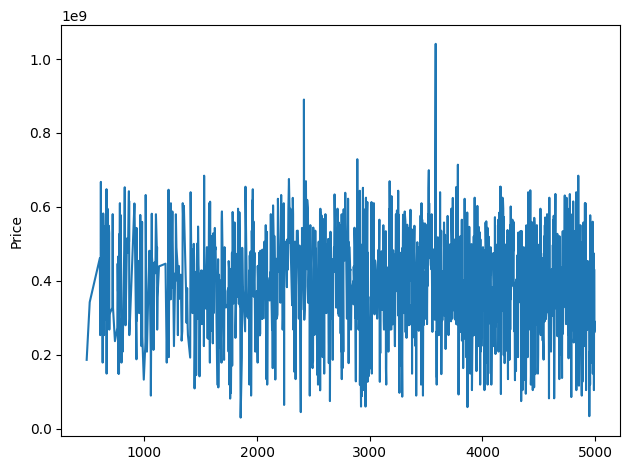

In [ ]:
# Visualize the price
plt.plot(used_cars['Price'])
plt.title()
plt.ylabel('Price')
plt.xlabel('')
plt.tight_layout()
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

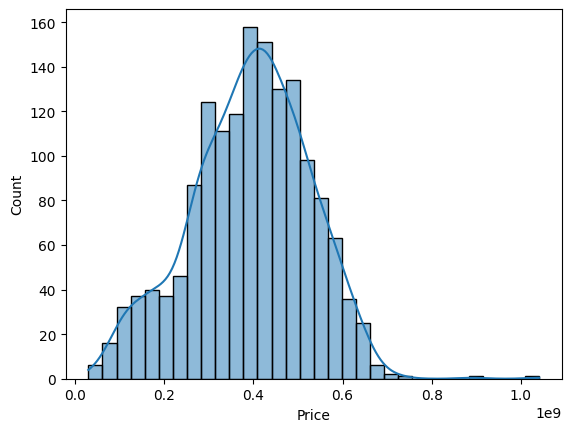

In [ ]:
# Visualize the price distribution
sns.histplot(used_cars['Price'], kde=True)

### Data Preparation

### Modeling

### Evaluation